# EXPLORATION_DJ
# 카메라 스티커앱 만들기 

## ◈  학습목표

1. 카메라앱 만들기를 통해 동영상 처리, 검출, 키포인트 추정, 추적, 카메라 원근의 기술  
2. 간단한 스티커부터 시작해서 `각도 변화가 가능`하고, `거리 변화에 강건한 스티커`까지 만들기

**직접 사진을 찍고 스티커를를  씌워 보는 것**  
* 얼굴인식 카메라의 흐름을 이해
* dlib 라이브러리 사용
* 이미지 배열의 인덱싱 예외 처리

## ◈  스티커 만드는 순서
face landmark 데이터셋은 눈, 코, 입과 턱을 포함하는데, 얼굴의 랜드마크를 찾으면 머리의 위치를 찾고, 눈과 코의 위치로부터 스티커의 위치 정보를 유추할 수 있다.

 `1. 얼굴이 포함된 사진을 준비 (과거에 찍은 셀카 사용)`   
 `2. landmark를 찾기 위해서는 얼굴의 bounding box를 찾기`  
 `3. bounding box로 잘라낸(crop) 얼굴 이미지로 부터 face landmark를 찾음`  
 `4. 찾아진 영역으로 부터 스티커를 붙이기`

**Object keypoint estimation 알고리즘**

`1) top-down : bounding box를 찾고 box 내부의 keypoint를 예측`

2) bottom-up : 이미지 전체의 keypoint를 먼저 찾고 point 관계를 이용해 군집화해서 box 생성

 여기서는 `top-down 방식`을 사용
 

**Dlib landmark localization**  
잘라진 얼굴 이미지에서 아래 68개의 이목구비 위치

![png](./img/E-8-8.png)
                        [Dlib에 사용 되는 랜드마크 순서]

# 프로젝트: 고양이 수염 스티커 만들기


## Step 1. 스티커 구하기 or 만들기
고양이 수염 이미지  
(1) 고양이 수염 이미지를 다운로드 받기  
https://www.flaticon.com/free-icon/cat-whiskers_24674?term=cat%20nose&page=1&position=1  
(2) 셀카 이미지도 촬영  

## Step 2. 얼굴 검출 & 랜드마크 검출하기
`dlib을 이용`해서 얼굴의 `bounding box 위치`와 `landmark의 위치`를 찾기

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
print("🌫🛸")

🌫🛸


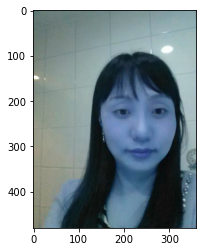

In [2]:
import os
my_image_path = os.getenv('HOME')+'/img/3.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (360, 480))    # 360X480의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

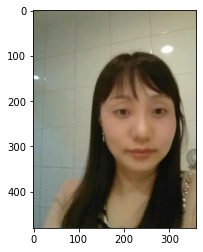

In [3]:
# plt.imshow 이전에 RGB 이미지로 바꾸기
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [4]:
#dlib로 hog detector 선언
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
print("🌫🛸")

🌫🛸


In [5]:
#detector로 얼굴의 bounding box 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print("🌫🛸")

🌫🛸


In [6]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

rectangles[[(139, 180) (324, 366)]]


좌측 상단 좌표 x,y (139, 180), 우측 하단 좌표 x,y(324, 366)


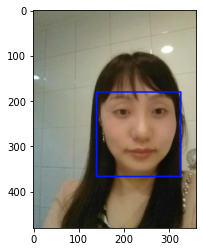

In [7]:
#찾은 얼굴 영역의 top, bottom, left, right 위치 얻기
i = 0
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    print("좌측 상단 좌표 x,y ({}, {}), 우측 하단 좌표 x,y({}, {})".format(l, t, r, b))
    
    #찾은 얼굴 영역 좌표로 사각형 그리기 
    cv2.rectangle(img_show, (l,t), (r,b), (255,25,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## Step 3. 스티커 적용 위치 확인하기  
고양이 수염이 적용될 위치를 landmark를 사용해서 계산

In [8]:
#landmark 모델 불러오기
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [9]:
#landmark 찾기
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))
list_landmarks[0][2]  #landmark된 왼쪽 얼굴 윤곽 위치 좌표

68


(152, 264)

**Object keypoint estimation 알고리즘**

`1) top-down : bounding box를 찾고 box 내부의 keypoint를 예측`

2) bottom-up : 이미지 전체의 keypoint를 먼저 찾고 point 관계를 이용해 군집화해서 box 생성

 여기서는 `top-down 방식`을 사용
 

**Dlib landmark localization**  
잘라진 얼굴 이미지에서 아래 68개의 이목구비 위치

![png](./img/E-8-8.png)
                        [Dlib에 사용 되는 랜드마크 순서]

0 (146, 215)
1 (147, 240)
2 (152, 264)
3 (157, 286)
4 (167, 307)
5 (180, 326)
6 (196, 342)
7 (216, 353)
8 (236, 356)
9 (256, 353)
10 (273, 341)
11 (287, 326)
12 (299, 308)
13 (307, 288)
14 (312, 267)
15 (315, 245)
16 (314, 222)
17 (165, 197)
18 (178, 189)
19 (194, 186)
20 (210, 189)
21 (225, 195)
22 (253, 194)
23 (266, 188)
24 (280, 184)
25 (295, 185)
26 (306, 194)
27 (239, 219)
28 (239, 237)
29 (240, 254)
30 (241, 272)
31 (221, 284)
32 (230, 286)
33 (240, 289)
34 (248, 286)
35 (256, 283)
36 (181, 223)
37 (192, 219)
38 (203, 220)
39 (212, 226)
40 (202, 228)
41 (191, 228)
42 (261, 226)
43 (270, 218)
44 (281, 217)
45 (291, 222)
46 (282, 227)
47 (271, 227)
48 (203, 310)
49 (218, 307)
50 (231, 304)
51 (240, 307)
52 (248, 304)
53 (259, 306)
54 (270, 309)
55 (259, 319)
56 (248, 325)
57 (239, 326)
58 (230, 325)
59 (217, 321)
60 (209, 310)
61 (231, 312)
62 (239, 314)
63 (248, 312)
64 (266, 310)
65 (248, 312)
66 (239, 314)
67 (231, 313)


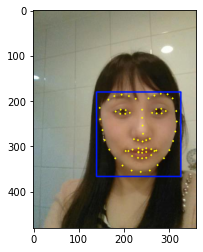

(480, 360, 3)

In [10]:
# 찾은 landmark 이미지에 표시(68개)
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        print(idx, point)
        #landmark 노란색 원으로 표시
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # (G+B = yellow)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()
img_show_rgb.shape

In [11]:
#얼굴의 중심 위치 찾기 (landmark 30 - 얼굴 중심) 
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] 
    w = dlib_rect.width()     #
    h = dlib_rect.width()     #
    print ('얼굴 중심 (x,y) : (%d,%d)'%(x,y))
    print ('bounding box 크기 (w,h) : (%d,%d)'%(w,h))

(241, 272)
얼굴 중심 (x,y) : (241,272)
bounding box 크기 (w,h) : (186,186)


(186, 186, 3)


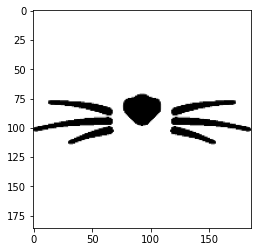

In [12]:
#스티커 이미지 불러오기
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat0.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)
plt.imshow(img_sticker)
plt.show()

In [13]:
refined_x = x - w // 2  # left
refined_y = y - h //2   # top

print ('왼쪽 상단 좌표값 :(x,y) : (%d,%d)'%(refined_x, refined_y))

왼쪽 상단 좌표값 :(x,y) : (148,179)


In [14]:
# 스티커 영역이 이미지 밖으로 넘어가지 않아서 스티커 이미지를 자르고 저장하지 않는다.
#    img_sticker = img_sticker[-refined_y:]
#    refined_y = 0
print (img_sticker.shape)

(186, 186, 3)


In [15]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

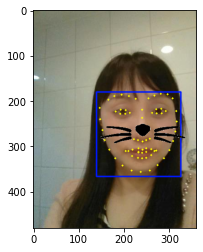

In [16]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

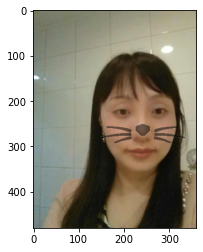

In [17]:
#landmark와 bounding box 없애고 그리기
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area, 0.5, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8), 0.5, 0)
     #2개의 이미지를 겹처서 그릴 때 사용하는 addWeighted 사용
     #cv2.addWeighted(src1, alpha, src2, beta, gamma)
     #src1과 src2 영상을 각각 α, β의 가중치를 사용하여 blending 한다.

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 고양이 스트커 붙이기 결과 :

## ♣ 다른 이미지로 bounding box와 landmark해보기

(689, 914, 3)


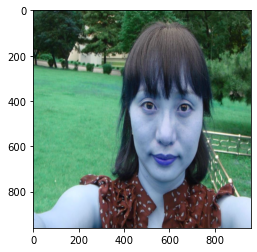

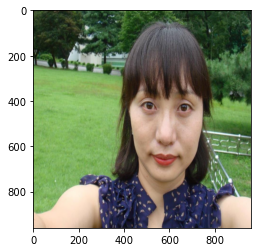

In [18]:
my_image_path = os.getenv('HOME')+'/img/내사진.jpg'
img = cv2.imread(my_image_path)
print(img.shape)

img_bgr = cv2.resize(img, (960, 960))  # 480X480의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

# plt.imshow 이전에 RGB 이미지로 바꾸기
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()


rectangles[[(375, 333) (760, 718)]]
좌측 상단 좌표 x,y (375, 333), 우측 하단 좌표 x,y(760, 718)


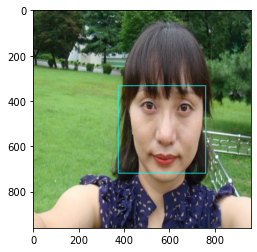

In [19]:
#dlib로 hog detector 선언
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

#detector로 얼굴의 bounding box 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

print(dlib_rects)   # 찾은 얼굴영역 좌표

#찾은 얼굴 영역의 top, bottom, left, right 위치 얻기
i = 0
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    print("좌측 상단 좌표 x,y ({}, {}), 우측 하단 좌표 x,y({}, {})".format(l, t, r, b))
    
    #찾은 얼굴 영역 좌표로 사각형 그리기 
    cv2.rectangle(img_show, (l,t), (r,b), (255,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

68


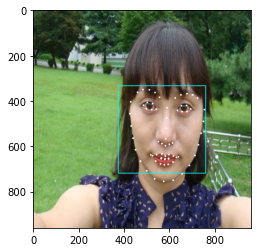

(960, 960, 3)

In [20]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

#landmark 찾기
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))
list_landmarks[0][2]  #landmark된 왼쪽 얼굴 윤곽 위치 좌표

# 찾은 landmark 이미지에 표시(68개)
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        #print(idx, point)
        #landmark 노란색 원으로 표시
        cv2.circle(img_show, point, 4, (255, 255, 255), -1) # (G+B = yellow)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()
img_show_rgb.shape

(584, 566)
얼굴 중심 (x,y) : (584,566)
bounding box 크기 (w,h) : (386,386)
(386, 386, 3)


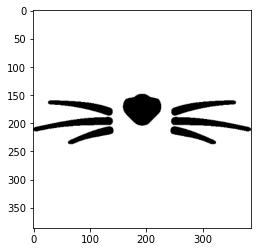

In [21]:
#얼굴의 중심 위치 찾기 (landmark 30 - 얼굴 중심) 
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] 
    w = dlib_rect.width()     #
    h = dlib_rect.width()     #
    print ('얼굴 중심 (x,y) : (%d,%d)'%(x,y))
    print ('bounding box 크기 (w,h) : (%d,%d)'%(w,h))
    
#스티커 이미지 불러오기
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat0.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)
plt.imshow(img_sticker)
plt.show()

In [22]:
refined_x = x - w // 2  # left
refined_y = y - h //2   # top

print ('왼쪽 상단 좌표값 :(x,y) : (%d,%d)'%(refined_x, refined_y))
print (img_sticker.shape)

왼쪽 상단 좌표값 :(x,y) : (391,373)
(386, 386, 3)


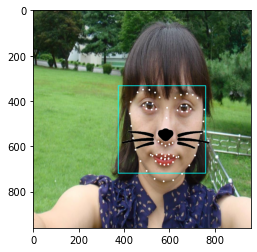

In [23]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

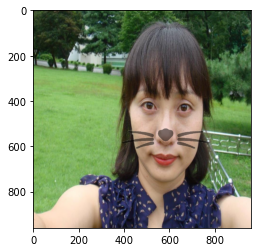

In [24]:
#landmark와 bounding box 없애고 그리기
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area, 0.5, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8), 0.5, 0)
     #2개의 이미지를 겹처서 그릴 때 사용하는 addWeighted 사용
     #cv2.addWeighted(src1, alpha, src2, beta, gamma)
     #src1과 src2 영상을 각각 α, β의 가중치를 사용하여 blending 한다.

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 다른 이미지 결과 :
동일한 로직에 다른 이미지를 사용하여 스트커 붙이기를 한 결과 정확한 코의 위치를 landmark하여 원본의 사진 이미지와 스크커를 이미지를 불투명하게 오버레이 할 수 있었다.  cv2의 `addWeighted(src1, alpha, src2, beta, gamma)함수`에서 `alpha와 gamma값을 비율을 동일하게 0.5`로 주어 두 이미지가 겹쳐 보이도록 조정하였다.  


## ♣ 이미지 각도 변경하여 bounding box와 landmark해보기

360 480


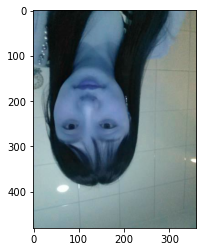

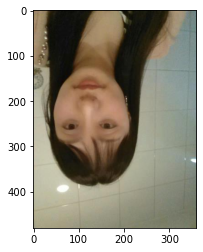

In [25]:
my_image_path = os.getenv('HOME')+'/img/3.jpg'
img = cv2.imread(my_image_path)

#이미지 오른쪽 회전
img_rotate_90_clockwise = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
#이미지 왼쪽 회전
img_rotate_90_counterclockwise = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
#이미지 180도 회전
img_rotate_180 = cv2.rotate(img, cv2.ROTATE_180)
print(img_rotate_90_clockwise.shape[0], img_rotate_90_clockwise.shape[1])


img_bgr = cv2.resize(img_rotate_180, (360, 480))  # 480X360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

# plt.imshow 이전에 RGB 이미지로 바꾸기
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()


rectangles[]


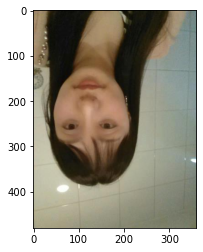

In [26]:
#dlib로 hog detector 선언
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

#detector로 얼굴의 bounding box 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

print(dlib_rects)   # 찾은 얼굴영역 좌표

#찾은 얼굴 영역의 top, bottom, left, right 위치 얻기
i = 0
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    print("좌측 상단 좌표 x,y ({}, {}), 우측 하단 좌표 x,y({}, {})".format(l, t, r, b))
    
    #찾은 얼굴 영역 좌표로 사각형 그리기 
    cv2.rectangle(img_show, (l,t), (r,b), (255,25,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 이미지 회전 결과 :
이미지를 좌우로 90도 회전하고 bounding box와 landmark 찾기를 시도해 보았으나, bounding box를 처음부터 찾지 못하는 결과를 얻었다.
우리가 사용하는 `bounding box의 모델이 사람의 얼굴 이미지를 정면에서 바라보고 위의 방향으로만 되어 있을 경우에만 학습된 모델`이기 때문이라고 생각된다.
또한, 약간 회전된 상태로 찾은 bounding box에서 landmakr하는 경우에는 landmark가 조우 대칭의 얼굴을 찾는 모델이여서 landmakr가 정확한 위치에 되지 않음을 알 수 있었다. 

## ♣ 밝기가 다른 이미지로 bounding box와 landmark해보기

(960, 960, 3)


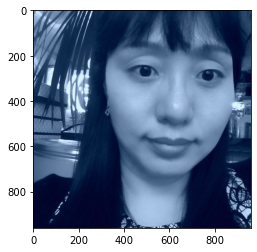

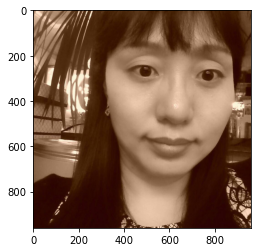

In [27]:
#========================================================
#brown filtter로 촬영한 이미지를 사용하여 스티커 붙여보기
#========================================================
my_image_path = os.getenv('HOME')+'/img/2014.jpg'
img = cv2.imread(my_image_path)
print(img.shape)

img_bgr = cv2.resize(img, (960, 960))  # 480X480의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

# plt.imshow 이전에 RGB 이미지로 바꾸기
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()


rectangles[[(280, 59) (946, 724)]]
좌측 상단 좌표 x,y (280, 59), 우측 하단 좌표 x,y(946, 724)


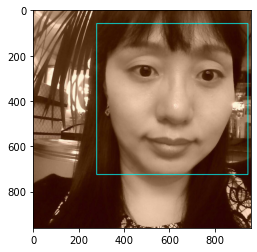

In [28]:
#dlib로 hog detector 선언
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

#detector로 얼굴의 bounding box 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

print(dlib_rects)   # 찾은 얼굴영역 좌표

#찾은 얼굴 영역의 top, bottom, left, right 위치 얻기
i = 0
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    print("좌측 상단 좌표 x,y ({}, {}), 우측 하단 좌표 x,y({}, {})".format(l, t, r, b))
    
    #찾은 얼굴 영역 좌표로 사각형 그리기 
    cv2.rectangle(img_show, (l,t), (r,b), (255,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

68


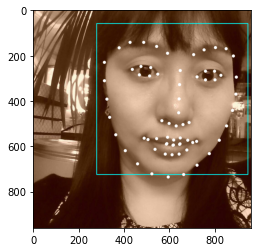

(960, 960, 3)

In [29]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

#landmark 찾기
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))
list_landmarks[0][2]  #landmark된 왼쪽 얼굴 윤곽 위치 좌표

# 찾은 landmark 이미지에 표시(68개)
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        #print(idx, point)
        #landmark 노란색 원으로 표시
        cv2.circle(img_show, point, 7, (255, 255, 255), -1) # (G+B = yellow)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()
img_show_rgb.shape

(641, 452)
얼굴 중심 (x,y) : (641,452)
bounding box 크기 (w,h) : (667,667)
(667, 667, 3)


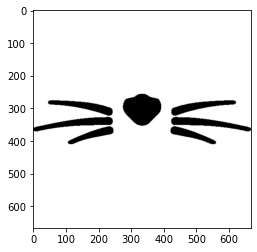

In [30]:
#얼굴의 중심 위치 찾기 (landmark 30 - 얼굴 중심) 
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] 
    w = dlib_rect.width()     #
    h = dlib_rect.width()     #
    print ('얼굴 중심 (x,y) : (%d,%d)'%(x,y))
    print ('bounding box 크기 (w,h) : (%d,%d)'%(w,h))
    
#스티커 이미지 불러오기
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat0.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)
plt.imshow(img_sticker)
plt.show()

In [31]:
refined_x = x - w // 2  # left
refined_y = y - h //2   # top

print ('왼쪽 상단 좌표값 :(x,y) : (%d,%d)'%(refined_x, refined_y))
print (img_sticker.shape)

왼쪽 상단 좌표값 :(x,y) : (308,119)
(667, 667, 3)


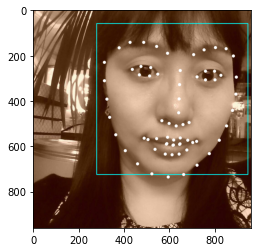

In [32]:
#sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
#img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
 #   np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

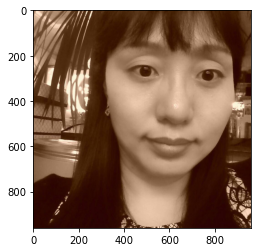

In [33]:
#landmark와 bounding box 없애고 그리기
#sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
#img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
#    cv2.addWeighted(sticker_area, 0.5, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8), 0.5, 0)
     #2개의 이미지를 겹처서 그릴 때 사용하는 addWeighted 사용
     #cv2.addWeighted(src1, alpha, src2, beta, gamma)
     #src1과 src2 영상을 각각 α, β의 가중치를 사용하여 blending 한다.

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 밝기가 다른 이미지 결과 :
브라운 필터로 촬영된 이미지는 흑백이미지와 같은 특성을 보였다. 그래서 인지 landmark까지 찾을 수 있었지만, 마지막 스티커 이미지와 원본이미지를 오버레이하는 부분에서 에러가 발생하였고, 정확한 이유는 알 수가 없었다. 
cv2에서 이미지를 resize하는 부분도 흑백이나 모노톤의 이미지여서 작동을 하지 않는지는 좀더 확인해 보아야 할 것이다. 

### ◈ 루브릭

**1. 자기만의 카메라앱 기능 구현을 완수하였다.**  
원본에 스티커 사진이 정상적으로 합성되었다. 

**2. 스티커 이미지를 정확한 원본 위치에 반영하였다.**   
정확한 좌표계산을 통해 고양이 수염의 위치가 원본 얼굴에 잘 어울리게 출력되었다. 

**3. 카메라 스티커앱을 다양한 원본이미지에 적용했을 때의 문제점을 체계적으로 분석하였다.**  
얼굴각도, 이미지 밝기, 촬영거리 등 다양한 변수에 따른 영향도를 보고서에 체계적으로 분석하였다.
